In [36]:
##Importing datasets


In [37]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns


In [1]:
# import csv file
df = pd.read_csv(r'C:\Users\Acer\Documents\Downloads\Python Project\Data analysis project using Python\Sales Data.csv', encoding= 'unicode_escape')

NameError: name 'pd' is not defined

In [39]:
C:\Users\Acer\Documents\Downloads\Python Project\Data analysis project using Python#data matrixC:\Users\Acer\Documents\Downloads\Python Project\Data analysis project using Python
df.shape

(185950, 11)

In [40]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [41]:
# describe all the columns in "df" 
df.describe(include = "all")

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
count,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950,185950,185950.000000,185950.000000,185950,185950.000000
unique,NaN,NaN,19,NaN,NaN,142395,140787,NaN,NaN,9,NaN
top,NaN,NaN,USB-C Charging Cable,NaN,NaN,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016",NaN,NaN,San Francisco,NaN
freq,NaN,NaN,21903,NaN,NaN,8,9,NaN,NaN,44732,NaN
mean,8340.388475,230417.569379,NaN,1.124383,184.399735,NaN,NaN,7.059140,185.490917,NaN,14.413305
std,5450.554093,51512.737110,NaN,0.442793,332.731330,NaN,NaN,3.502996,332.919771,NaN,5.423416
min,0.000000,141234.000000,NaN,1.000000,2.990000,NaN,NaN,1.000000,2.990000,NaN,0.000000
25%,3894.000000,185831.250000,NaN,1.000000,11.950000,NaN,NaN,4.000000,11.950000,NaN,11.000000
50%,7786.000000,230367.500000,NaN,1.000000,14.950000,NaN,NaN,7.000000,14.950000,NaN,15.000000
75%,11872.000000,275035.750000,NaN,1.000000,150.000000,NaN,NaN,10.000000,150.000000,NaN,19.000000


In [42]:
# look at the info of "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [43]:
##Exploratory Data Analysis

In [44]:
#check data frame columns
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [45]:
# Convert 'Order Date' to a datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [46]:
# Extract the year and month from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

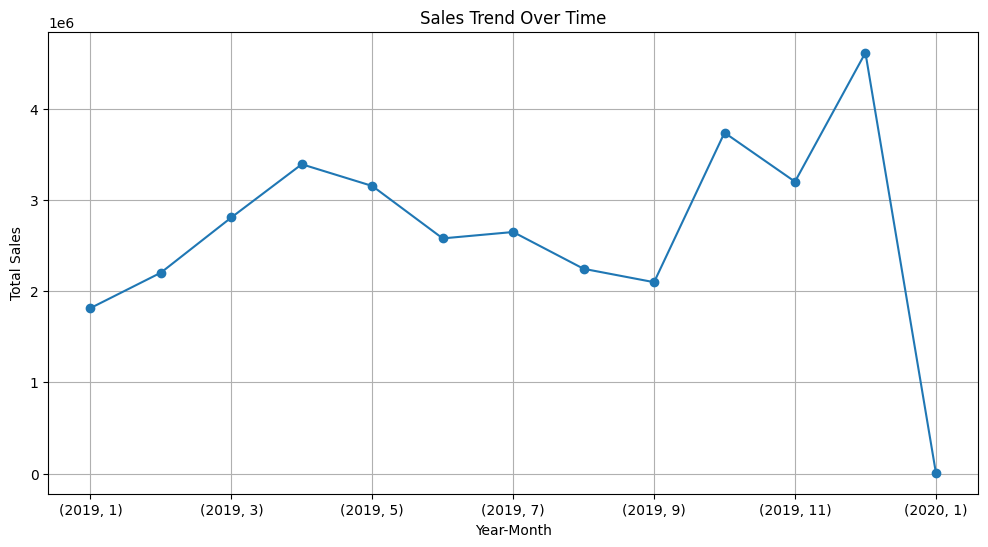

In [47]:
# Sales Trend Over Time
sales_trend = df.groupby(['Year', 'Month'])['Sales'].sum()
sales_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [48]:
# Top Selling Products
top_selling_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
print("Top Selling Products:")
print(top_selling_products)

Top Selling Products:
Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


In [49]:
# Revenue Metrics
total_revenue = df['Sales'].sum()
average_order_value = df.groupby('Order ID')['Sales'].sum().mean()
unique_customers = df['Purchase Address'].nunique()

In [50]:
print("Total Revenue:", total_revenue)
print("Average Order Value:", average_order_value)
print("Unique Customers:", unique_customers)

Total Revenue: 34492035.97
Average Order Value: 193.30091836334392
Unique Customers: 140787
